In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from astropy.io import fits

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [10]:
files = ['kplr006117832-2010174085026_llc.fits', 'kplr007420545-2010078095331_llc.fits', 'kplr010071383-2012277125453_llc.fits']

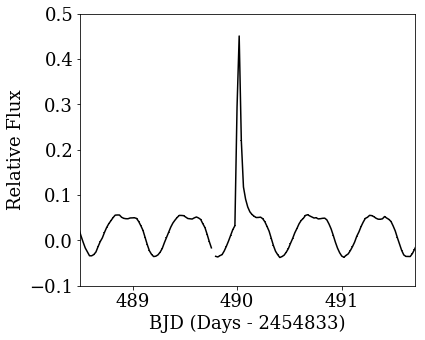

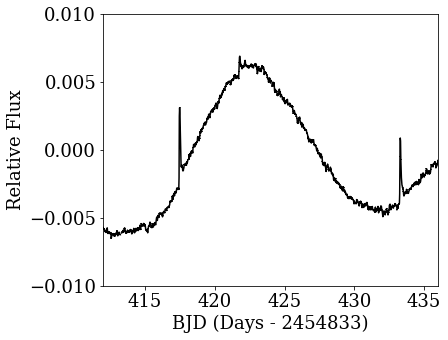

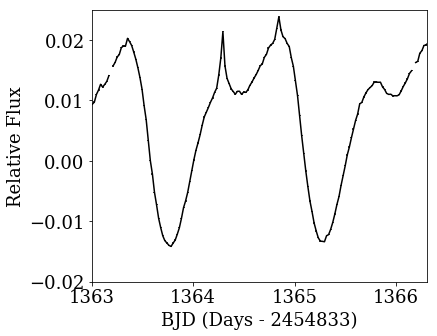

In [45]:
xlims = [[488.5, 491.7], 
         [412.0, 436.0], 
         [1363.0, 1366.3]]
ylims = [[-.1,.5],
         [-.01,.01],
         [-.02,.025]]

figs = ['fig1a', 'fig1b', 'fig1c'] 

for k in range(len(files)):
    hdu = fits.open(files[k])
    data = hdu[1].data
    hdu.close()

    plt.figure(figsize=(6,5))
    plt.errorbar(data['TIME'], (data['SAP_FLUX'] - np.nanmedian(data['SAP_FLUX']))/np.nanmedian(data['SAP_FLUX']), 
                 yerr=data['SAP_FLUX_ERR'] / np.nanmedian(data['SAP_FLUX']), color='k')
    plt.xlim(xlims[k])
    plt.ylim(ylims[k])
    plt.xlabel('BJD (Days - 2454833)')
    plt.ylabel('Relative Flux')
    plt.savefig('../'+figs[k]+'.pdf', dpi=300, bbox_inches='tight', pad_inches=0.25)
    